# Real estate-Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("BostonHousing.csv")

In [3]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,NaN,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,NaN,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

In [6]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284525,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704842,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<AxesSubplot: title={'center': 'crim'}>,
        <AxesSubplot: title={'center': 'zn'}>,
        <AxesSubplot: title={'center': 'indus'}>,
        <AxesSubplot: title={'center': 'chas'}>],
       [<AxesSubplot: title={'center': 'nox'}>,
        <AxesSubplot: title={'center': 'rm'}>,
        <AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'dis'}>],
       [<AxesSubplot: title={'center': 'rad'}>,
        <AxesSubplot: title={'center': 'tax'}>,
        <AxesSubplot: title={'center': 'ptratio'}>,
        <AxesSubplot: title={'center': 'b'}>],
       [<AxesSubplot: title={'center': 'lstat'}>,
        <AxesSubplot: title={'center': 'medv'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

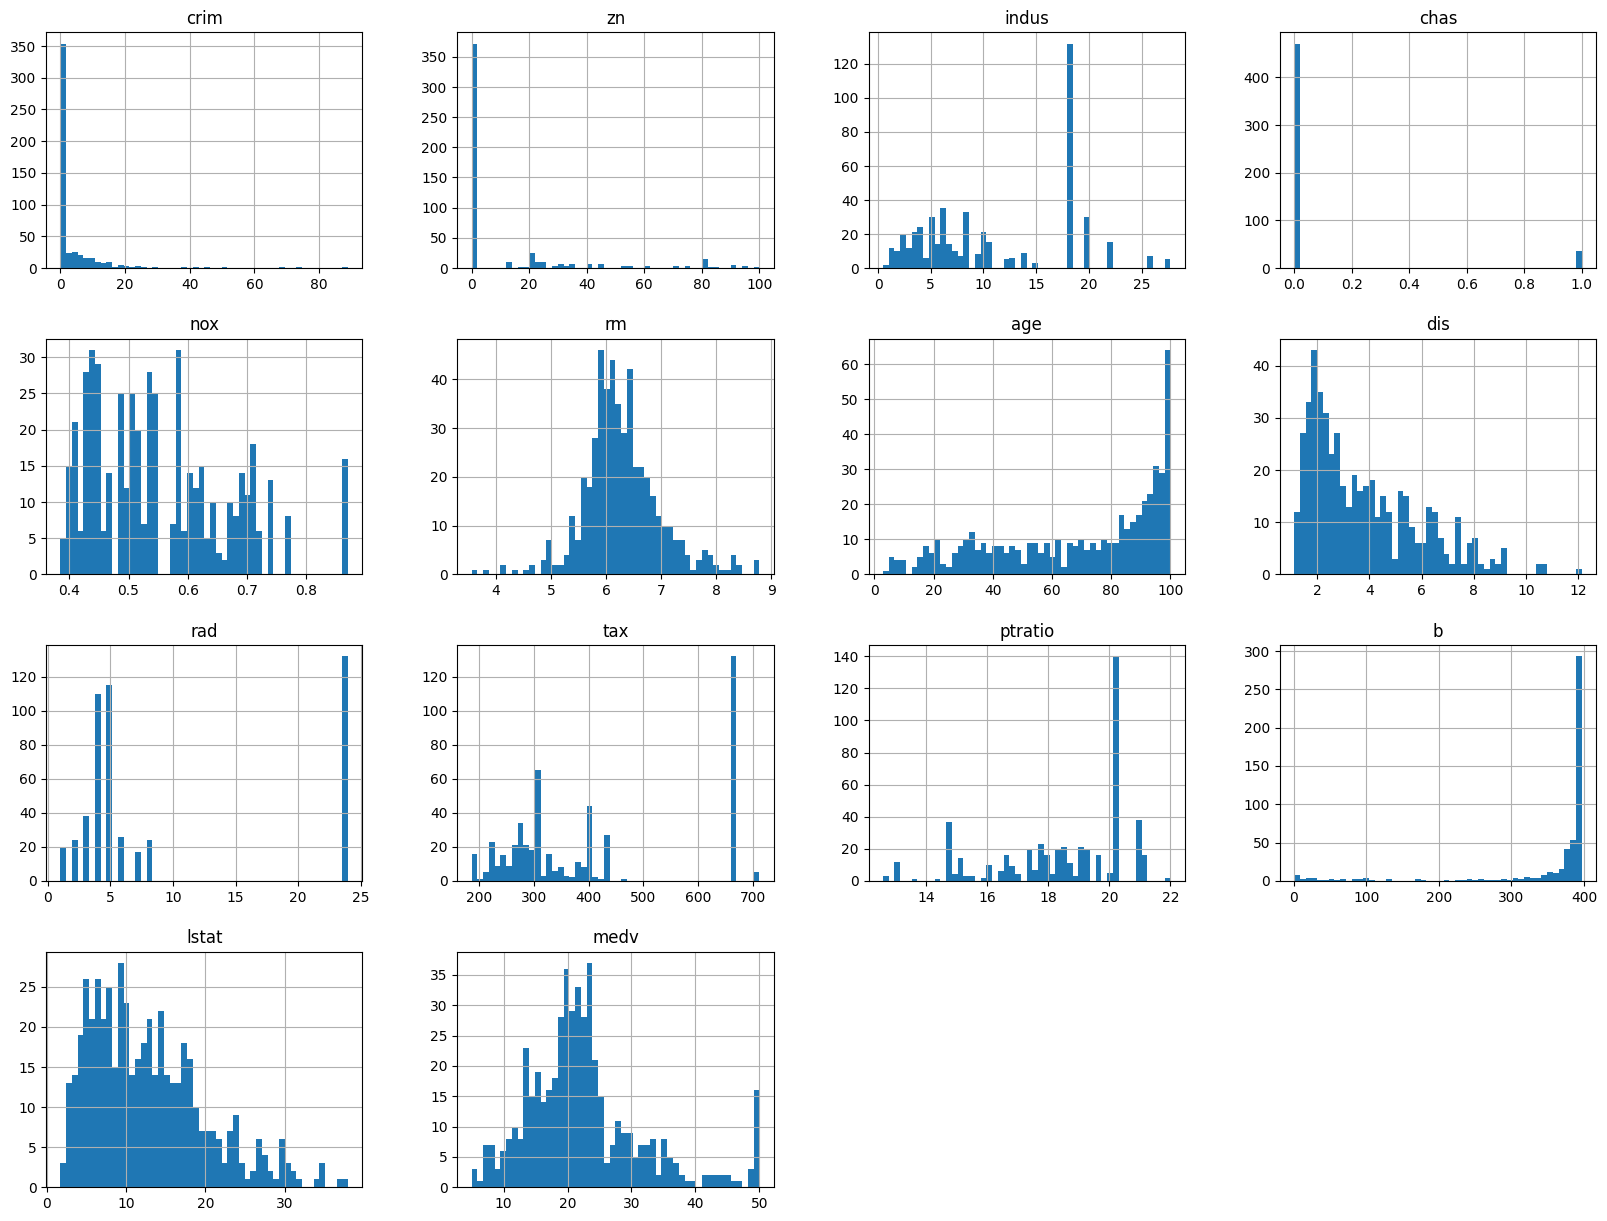

In [9]:
housing.hist(bins=50,figsize=(20,15))

## Train-Test Splitting

In [10]:
#
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
#train_set, test_set=split_train_test(housing, 0.2)

In [12]:
#print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

In [13]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:404
Rows in test set:102



In [14]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
for train_index,test_index in kf.split(housing):
    print(len(train_index),"  ",len(test_index))

337    169
337    169
338    168


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['chas']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [16]:
strat_test_set

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


## Looking for correlations

In [17]:
corr_matrix = housing.corr()
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.694822
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

array([[<AxesSubplot: xlabel='medv', ylabel='medv'>,
        <AxesSubplot: xlabel='rm', ylabel='medv'>,
        <AxesSubplot: xlabel='zn', ylabel='medv'>,
        <AxesSubplot: xlabel='lstat', ylabel='medv'>],
       [<AxesSubplot: xlabel='medv', ylabel='rm'>,
        <AxesSubplot: xlabel='rm', ylabel='rm'>,
        <AxesSubplot: xlabel='zn', ylabel='rm'>,
        <AxesSubplot: xlabel='lstat', ylabel='rm'>],
       [<AxesSubplot: xlabel='medv', ylabel='zn'>,
        <AxesSubplot: xlabel='rm', ylabel='zn'>,
        <AxesSubplot: xlabel='zn', ylabel='zn'>,
        <AxesSubplot: xlabel='lstat', ylabel='zn'>],
       [<AxesSubplot: xlabel='medv', ylabel='lstat'>,
        <AxesSubplot: xlabel='rm', ylabel='lstat'>,
        <AxesSubplot: xlabel='zn', ylabel='lstat'>,
        <AxesSubplot: xlabel='lstat', ylabel='lstat'>]], dtype=object)

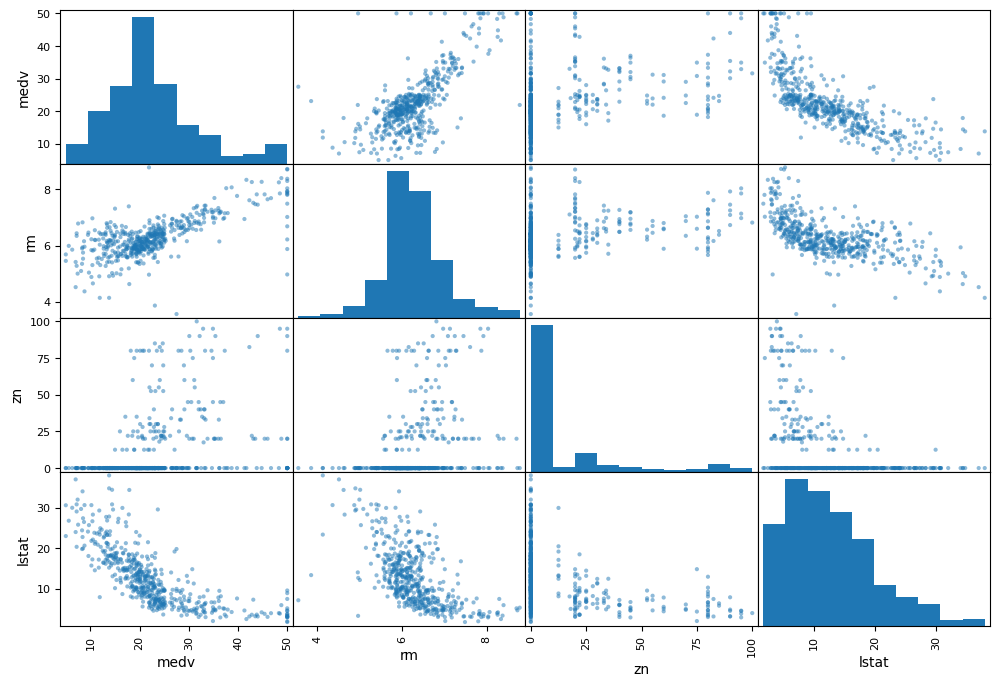

In [18]:
from pandas.plotting import scatter_matrix
attributes = ['medv','rm','zn','lstat']
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot: xlabel='rm', ylabel='medv'>

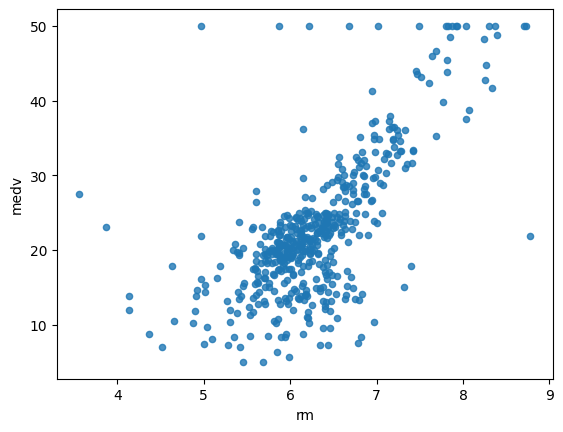

In [19]:
housing.plot(kind="scatter",x="rm",y="medv",alpha=0.8)

## Attribute combinations

In [20]:
housing['taxrm']=housing['tax']/housing['rm']

In [21]:
housing['taxrm']

0            NaN
1      37.688834
2      33.681280
3            NaN
4      31.061984
         ...    
501    41.407553
502    44.607843
503    39.134174
504    40.182514
505    45.273632
Name: taxrm, Length: 506, dtype: float64

In [22]:
corr_matrix = housing.corr()
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.694822
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
taxrm     -0.537344
lstat     -0.737663
Name: medv, dtype: float64

<AxesSubplot: xlabel='taxrm', ylabel='medv'>

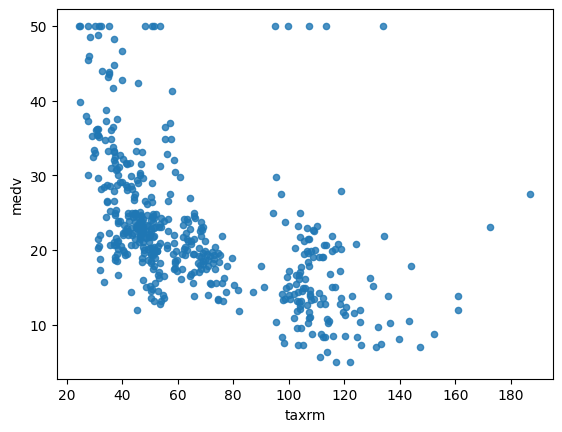

In [23]:
housing.plot(kind="scatter",x="taxrm",y="medv",alpha=0.8)

In [24]:
housing = strat_train_set.drop("medv", axis=1)
housing_labels = strat_train_set["medv"].copy()

## Missing attributes

In [25]:
a=housing.dropna(subset=['rm'])
a.shape

(399, 13)

In [26]:
housing.drop("rm",axis=1).shape

(404, 12)

In [27]:
median=housing['rm'].median()
housing['rm'].fillna(median)
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279712,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715864,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [29]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [30]:
X=imputer.transform(housing)
print(X)

[[4.81900e-02 8.00000e+01 3.64000e+00 ... 1.64000e+01 3.92890e+02
  6.57000e+00]
 [1.50100e-02 8.00000e+01 2.01000e+00 ... 1.70000e+01 3.90940e+02
  5.99000e+00]
 [4.87141e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.96210e+02
  1.86800e+01]
 ...
 [8.18700e-02 0.00000e+00 2.89000e+00 ... 1.80000e+01 3.93530e+02
  3.57000e+00]
 [4.75237e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 5.09200e+01
  1.81300e+01]
 [4.56000e-02 0.00000e+00 1.38900e+01 ... 1.64000e+01 3.92800e+02
  1.35100e+01]]


In [31]:
housing_tr=pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278861,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711450,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily, three types of objects 
1. Estimators - It estimates some parameter based on a database eg:- Imputer 
It has a fit method and transform method
Fit- fits the dataset and claculates internal parameter

2. Transfromers- transform method takes input and returns output based on the learnings from fit(). It also has a convenience funcion called fit_transform() which fits and then transforms.

3. Predictors- LinearRegression model is an example of predictor- fit and predic() are two common functions. It also gives score function which evaluate the predictions

## Creating a Pipeline

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy="median")),('std_scaler',StandardScaler())])

In [33]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [34]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for real Estate

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [36]:
some_data=housing.iloc[:5]

In [37]:
some_labels=housing_labels.iloc[:5]

In [38]:
prepared_data=my_pipeline.transform(some_data)

In [39]:
model.predict(prepared_data)

array([22.196, 25.341, 16.7  , 23.285, 23.688])

In [40]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
housing_predictions=model.predict(housing_num_tr)

In [43]:
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)

In [44]:
lin_mse

1.4793821485148486

## Using better evaluation technique- Cross Validation

In [45]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [46]:
rmse_scores

array([2.78784699, 2.69551301, 4.51244822, 2.54472688, 3.38015671,
       2.61194112, 4.87478671, 3.27248759, 2.90183495, 3.57488612])

In [47]:
def print_scores(scores):
    print("Scores are:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [48]:
print_scores(rmse_scores)

Scores are: [2.78784699 2.69551301 4.51244822 2.54472688 3.38015671 2.61194112
 4.87478671 3.27248759 2.90183495 3.57488612]
Mean: 3.315662829198497
Standard deviation: 0.7655310676722481


## Saving the model

In [49]:
from joblib import dump, load
dump(model,'Ayush.joblib')

['Ayush.joblib']

## Testing the Model

In [57]:
X_test=strat_test_set.drop("medv",axis=1)
Y_test=strat_test_set["medv"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [58]:
final_rmse

2.898073687475736

In [59]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24045716, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [60]:
from joblib import dump, load
import numpy as np
model = load('Ayush.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([25.662])